Main Assignment:
Write the complete code to select the best Regressor and classifier for the given dataset called diamonds `(if you have a high end machine, you can use the whole dataset, else use the sample dataset provided in the link)` or you can use Tips datset for Regression task and Iris dataset for Classification task.


You have to choose all possible models with their best or possible hyperparameters and compare them with each other and select the best model for the given dataset.
Your code should be complete and explained properly. for layman, each and every step of the code should be commented properly.


You code should also save the best model in the pickle file.

You should also write the code to load the pickle file and use it for prediction. in the last snippet of the code.

Submit your assignment to the discord inbox. (Do not share the link of your notebook, just upload the notebook in the discord inbox). Do not share the notebook in public channels on our discord server.


Deadline for Submission:
29th December before 09:30 pm Pakistan time. (No late submission will be accepted).

# Regression Algorithm


`01:` **Linear Regression**\
`02:` **SVR (Support Vector Regression)**\
`03:` **Decision Tree Regression**\
`04:` **Random Forest Regression**\
`05:` **Gradient Boosting Regression**\
`06:` **KNN Regression**\
`07:` **XGBoost Regression**\
`08:` **CatBoost Regression**\
`09:` **Light GBM Regression**\
`10:` **GaussianNB Regression**\
`11:` **Huber Regression**




In [59]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# import regression algorithms
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import HuberRegressor

#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV

# import preprocessors or data Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# import pipeline
from sklearn.pipeline import Pipeline

# import preprocessing
from sklearn.preprocessing import minmax_scale


In [60]:
diamonds=sns.load_dataset("diamonds").sample(n=1000,random_state=42)
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [69]:
diamonds.rename(columns={'x':'X length','y':"Y width",'z':"Z depth"},inplace=True)

In [70]:
stats=diamonds.describe()
stats

,carat,depth,table,price,X length,Y width,Z depth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.827500,61.759700,57.368800,4165.147000,5.80121,5.800870,3.580360
std,0.490193,1.401489,2.303578,4190.104476,1.14740,1.142003,0.700021
min,0.230000,55.200000,53.000000,360.000000,3.89000,3.930000,2.430000
25%,0.410000,61.100000,56.000000,1007.000000,4.74000,4.750000,2.950000
50%,0.710000,61.900000,57.000000,2542.500000,5.74500,5.750000,3.550000
75%,1.080000,62.500000,59.000000,5569.750000,6.60000,6.600000,4.060000
max,2.750000,68.400000,73.000000,18803.000000,9.04000,8.980000,5.490000


In [77]:
print(f"""
1. The dataset consists of {int(stats.loc['count', 'carat'])} diamond records.
2. Diamond carat weights range from {stats.loc['min', 'carat']} to {stats.loc['max', 'carat']}, with an average of {stats.loc['mean', 'carat']:.2f}.
3. The mean depth percentage is {stats.loc['mean', 'depth']:.2f}%, with a standard deviation of {stats.loc['std', 'depth']:.2f}%.
4. The average table size is {stats.loc['mean', 'table']:.2f}%, varying typically by {stats.loc['std', 'table']:.2f}%.
5. Prices vary widely, from ${stats.loc['min', 'price']:.2f} to ${stats.loc['max', 'price']:.2f}, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately ({stats.loc['mean', 'X length']:.2f} x {stats.loc['mean', 'Y width']:.2f} x {stats.loc['mean', 'Z depth']:.2f}).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.
""")


1. The dataset consists of 1000 diamond records.
2. Diamond carat weights range from 0.23 to 2.75, with an average of 0.83.
3. The mean depth percentage is 61.76%, with a standard deviation of 1.40%.
4. The average table size is 57.37%, varying typically by 2.30%.
5. Prices vary widely, from $360.00 to $18803.00, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately (5.80 x 5.80 x 3.58).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.



In [87]:
print("\n``````````````````````````````````````````````````")
print("Shape of the data set")
print(f"Total number of rows in the data set is: {diamonds.shape[0]}")
print(f"Total number of columns in the data set is: {diamonds.shape[1]}")
print("\n``````````````````````````````````````````````````")




``````````````````````````````````````````````````
Shape of the data set
Total number of rows in the data set is: 1000
Total number of columns in the data set is: 10

``````````````````````````````````````````````````


## `1` Preprocessing the data
Preprocessing is essential in the machine learning pipeline, involving preparing and cleaning raw data to make it suitable for training models.

### **Some common preprocessing steps**


- **`1`** Handling Missing Data
- **`2`** Data Cleaning
- **`3`** Handling Categorical Data
- **`4`** Feature Scaling
- **`5`** Dealing with Outliers
- **`6`** Feature Engineering
- **`7`** Handling Time-Series Data
- **`8`** Data Splitting
- **`9`** Handling Skewed Data


**`Handling missing data and data cleaning are essential steps in ensuring the accuracy and reliability of a dataset.`**


- **Handling Missing Data:** The process of identifying and resolving gaps or incomplete information in a dataset.

In [ ]:
diamonds.isnull().sum()
print(":::::::::::: Sum of Missing Values ::::::::::::")
print(diamonds.isnull().sum())

:::::::::::: Sum of Missing Values ::::::::::::
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


> We visualized the distribution of null values in the dataset using a graphical representation, such as a heatmap, to gain insights into the missing data patterns and identify areas that may require further attention 

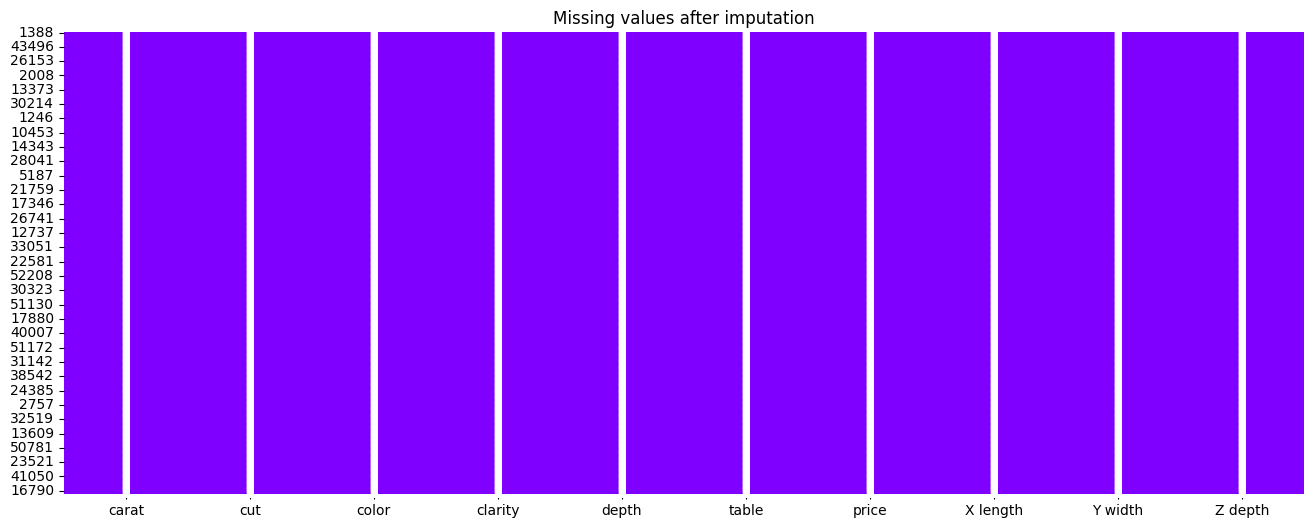

In [101]:
# Plotting heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(diamonds.isnull(), cbar=False,cmap="rainbow",annot=True,linewidths=0.0,linecolor="red")
plt.title('Missing values after imputation')
plt.show()

**`Handling Categorical Data:`**  Handling categorical values involves converting qualitative data into a numerical format through techniques like **label encoding**, **one-hot encoding**, or other methods.

- **`One-hot encoding:`** is used in machine learning by helping pipelines to convert categorical variables into binary.

In [ ]:
models = {
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(),
    "lgb": LGBMRegressor(),  # Instantiate LGBMRegressor
    "GaussianNB": GaussianNB(),
    "HuberRegressor": HuberRegressor()
    }


In [ ]:
for name,model in models.items():
    pipeline=Pipeline(['imputer',OneHotEncoder(handle_unknown='ignore'),
                   'model',models,"StandardScaler",MinMaxScaler()])

In [ ]:
hyperparameters = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [None, 5, 10, 30],
    'model__min_samples_split': [2, 5, 10, 15]
}

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('model', model)
])


In [37]:
X=diamonds.drop("carat",axis=1)
Y=diamonds["carat"]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=42,test_size=0.20)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, Y_train, cv=5)

pipeline.fit(X_train,Y_train)


In [29]:
pred=pipeline.predict(X_test)

In [9]:
from sklearn.model_selection import cross_val_score
GridSearch=GridSearchCV(pipeline,hyperparameters,cv=5,scoring='neg_mean_squared_error')

**Write code for two or more algorithms, perform hyperparameter tuning.**

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)

# Support Vector Machine Classifier
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42)
svm_grid_search = GridSearchCV(svm_model, svm_params, cv=5)
svm_grid_search.fit(X_train, y_train)

# Evaluate the models
rf_best_model = rf_grid_search.best_estimator_
svm_best_model = svm_grid_search.best_estimator_

rf_predictions = rf_best_model.predict(X_test)
svm_predictions = svm_best_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print the results
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("\nRandom Forest Best Parameters:", rf_grid_search.best_params_)
print("Support Vector Machine Best Parameters:", svm_grid_search.best_params_)


Random Forest Accuracy: 1.0
Support Vector Machine Accuracy: 1.0

Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Support Vector Machine Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


**Write code for two or more algorithms, perform hyperparameter tuning, and then select the best one.**

In [25]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)

# Support Vector Machine Classifier
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42)
svm_grid_search = GridSearchCV(svm_model, svm_params, cv=5)
svm_grid_search.fit(X_train, y_train)

# Support Vector KNeighborsRegressor

Gra_model=GradientBoostingClassifier()

Gra_params = {
    'loss': ['log_loss', 'exponential'],   
    'max_features': ['auto', 'sqrt', 'log2']
}

knn_grid_search=GridSearchCV(Gra_model,Gra_params,cv=5)
knn_grid_search.fit(X_train,y_train)

# Evaluate the models
rf_best_model = rf_grid_search.best_estimator_
svm_best_model = svm_grid_search.best_estimator_
knn_best_model = knn_grid_search.best_estimator_

rf_predictions = rf_best_model.predict(X_test)
svm_predictions = svm_best_model.predict(X_test)
knn_predictions = knn_grid_search.predict(X_test)


rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test,knn_predictions)
# Print the results
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("KNeighborsRegressor Machine Accuracy:", knn_accuracy)

print("\nRandom Forest Best Parameters:", rf_grid_search.best_params_)
print("Support Vector Machine Best Parameters:", svm_grid_search.best_params_)
print("KNeighborsRegressor Machine Best Parameters:", knn_grid_search.best_params_)

...
...
...


c:\Users\laptop zone\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\laptop zone\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\laptop zone\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\laptop zone\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\base.py", line 638, in _validate_params

Random Forest Accuracy: 1.0
Support Vector Machine Accuracy: 1.0
KNeighborsRegressor Machine Accuracy: 1.0

Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Support Vector Machine Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
KNeighborsRegressor Machine Best Parameters: {'loss': 'log_loss', 'max_features': 'sqrt'}
